In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
##Number of lattice points in x and y direction
Nx=100
Ny=50
##grid spacing
x=np.linspace(0,1,Nx)
y=np.linspace(0,1,Ny)
##initalise velocity 
u=np.zeros((Ny,Nx),dtype=float)
v=np.zeros((Ny,Nx),dtype=float)
##initialise density
rho=np.ones((Ny,Nx),dtype=float)
##initalise Temperature
T=np.zeros((Ny,Nx),dtype=float)
##Entropy generation
##Due to fluid friction
Sf=np.zeros((Ny,Nx),dtype=float)
##Due to irreversibility or finite temperature difference
St=np.zeros((Ny,Nx),dtype=float)
##Total entropy generation
S=np.zeros((Ny,Nx),dtype=float)
## Average Bejan number
Be=np.zeros((Ny,Nx), dtype=float)
# ##To compute kinematic viscoisty using Rayleigh number and prandtl number
csq=1/3
Pr=0.71
Ra=1e5
gy=-9.81
beta=1.01937e-4
Tb=1
Tt=-1
nu=np.sqrt((Pr/Ra)*beta*(Tb-Tt)*np.abs(gy)*Ny**3)
tau_nu=3*nu +0.5
omega=1/(tau_nu)
alpha=nu/Pr
tau_alpha=3*alpha+0.5
omega_s=1/(tau_alpha)
##Boundary conditions on the channel
Tn=Tt
Ts=Tb
##Assigning boundary condition
T[0,0:Nx]=Tn
T[Ny-1,0:Nx]=Ts
##Initialise local particle distribution function
f0=np.zeros((Ny,Nx),dtype=float)
f1=np.zeros((Ny,Nx),dtype=float)
f2=np.zeros((Ny,Nx),dtype=float)
f3=np.zeros((Ny,Nx),dtype=float)
f4=np.zeros((Ny,Nx),dtype=float)
f5=np.zeros((Ny,Nx),dtype=float)
f6=np.zeros((Ny,Nx),dtype=float)
f7=np.zeros((Ny,Nx),dtype=float)
f8=np.zeros((Ny,Nx),dtype=float)
##post collision local particle distribution function
f0c=np.zeros((Ny,Nx),dtype=float)
f1c=np.zeros((Ny,Nx),dtype=float)
f2c=np.zeros((Ny,Nx),dtype=float)
f3c=np.zeros((Ny,Nx),dtype=float)
f4c=np.zeros((Ny,Nx),dtype=float)
f5c=np.zeros((Ny,Nx),dtype=float)
f6c=np.zeros((Ny,Nx),dtype=float)
f7c=np.zeros((Ny,Nx),dtype=float)
f8c=np.zeros((Ny,Nx),dtype=float)
##Weights od digital particles
w0=4/9
w1=1/9
w2=1/9
w3=1/9
w4=1/9
w5=1/36
w6=1/36
w7=1/36
w8=1/36
##Initilaise equilibrium distribution function
f0eq=np.zeros((Ny,Nx),dtype=float)
f1eq=np.zeros((Ny,Nx),dtype=float)
f2eq=np.zeros((Ny,Nx),dtype=float)
f3eq=np.zeros((Ny,Nx),dtype=float)
f4eq=np.zeros((Ny,Nx),dtype=float)
f5eq=np.zeros((Ny,Nx),dtype=float)
f6eq=np.zeros((Ny,Nx),dtype=float)
f7eq=np.zeros((Ny,Nx),dtype=float)
f8eq=np.zeros((Ny,Nx),dtype=float)
##compute equilibrium distribution function
f0eq=(-1+u**2+csq)*(-1+v**2+csq)*rho
f1eq=-0.5*(u+u**2+csq)*(-1+v**2+csq)*rho
f2eq=-0.5*(-u+u**2+csq)*(-1+v**2+csq)*rho
f3eq=-0.5*(-1+u**2+csq)*(v+v**2+csq)*rho
f4eq=-0.5*(-1+u**2+csq)*(-v+v**2+csq)*rho
f5eq=0.25*(u+u**2+csq)*(v+v**2+csq)*rho
f6eq=0.25*(-u+u**2+csq)*(-v+v**2+csq)*rho
f7eq=0.25*(-u+u**2+csq)*(v+v**2+csq)*rho
f8eq=0.25*(u+u**2+csq)*(-v+v**2+csq)*rho
##Initialisation of equilibrium functions
f0=f0eq
f1=f1eq
f2=f2eq
f3=f3eq
f4=f4eq
f5=f5eq
f6=f6eq
f7=f7eq
f8=f8eq
##Source term
gy=-9.81
S0=np.zeros((Ny,Nx),dtype=float)
S1=np.zeros((Ny,Nx),dtype=float)
S2=np.zeros((Ny,Nx),dtype=float)
S3=np.zeros((Ny,Nx),dtype=float)
S4=np.zeros((Ny,Nx),dtype=float)
S5=np.zeros((Ny,Nx),dtype=float)
S6=np.zeros((Ny,Nx),dtype=float)
S7=np.zeros((Ny,Nx),dtype=float)
S8=np.zeros((Ny,Nx),dtype=float)
F=np.zeros((Ny,Nx),dtype=float)
##
for i in np.arange(1,Ny-1):
    for j in np.arange(0,Nx):
        F[i,j]=rho[i,j]*beta*T[i,j]*gy
        S3[i,j]=3*w3*F[i,j]*(-1)
        S4[i,j]=3*w4*F[i,j]*(1)
        S5[i,j]=3*w5*F[i,j]*(-1)
        S6[i,j]=3*w6*F[i,j]*(1)
        S7[i,j]=3*w7*F[i,j]*(-1)
        S8[i,j]=3*w8*F[i,j]*(1)
###collision at each lattice node
for i in np.arange(1,Ny-1):
    for j in np.arange(0,Nx):
        f0c[i,j]=f0[i,j]*(1-omega)+omega*f0eq[i,j]+S0[i,j]
        f1c[i,j]=f1[i,j]*(1-omega)+omega*f1eq[i,j]+S1[i,j]
        f2c[i,j]=f2[i,j]*(1-omega)+omega*f2eq[i,j]+S2[i,j]
        f3c[i,j]=f3[i,j]*(1-omega)+omega*f3eq[i,j]+S3[i,j]
        f4c[i,j]=f4[i,j]*(1-omega)+omega*f4eq[i,j]+S4[i,j]
        f5c[i,j]=f5[i,j]*(1-omega)+omega*f5eq[i,j]+S5[i,j]
        f6c[i,j]=f6[i,j]*(1-omega)+omega*f6eq[i,j]+S6[i,j]
        f7c[i,j]=f7[i,j]*(1-omega)+omega*f7eq[i,j]+S7[i,j]
        f8c[i,j]=f8[i,j]*(1-omega)+omega*f8eq[i,j]+S8[i,j]
        
##North boundary
f0c[0,:]=f0[0,:]
f1c[0,:]=f1[0,:]
f2c[0,:]=f2[0,:]
f3c[0,:]=f3[0,:]
f4c[0,:]=f4[0,:]
f5c[0,:]=f5[0,:]
f6c[0,:]=f6[0,:]
f7c[0,:]=f7[0,:]
f8c[0,:]=f8[0,:]
##South boundary
i=Ny-1
f0c[i,:]=f0[i,:]
f1c[i,:]=f1[i,:]
f2c[i,:]=f2[i,:]
f3c[i,:]=f3[i,:]
f4c[i,:]=f4[i,:]
f5c[i,:]=f5[i,:]
f6c[i,:]=f6[i,:]
f7c[i,:]=f7[i,:]
f8c[i,:]=f8[i,:]
# ##West boundary
# f0c[1:Ny-1,0]=f0[1:Ny-1,0]
# f1c[1:Ny-1,0]=f1[1:Ny-1,0]
# f2c[1:Ny-1,0]=f2[1:Ny-1,0]
# f3c[1:Ny-1,0]=f3[1:Ny-1,0]
# f4c[1:Ny-1,0]=f4[1:Ny-1,0]
# f5c[1:Ny-1,0]=f5[1:Ny-1,0]
# f6c[1:Ny-1,0]=f6[1:Ny-1,0]
# f7c[1:Ny-1,0]=f7[1:Ny-1,0]
# f8c[1:Ny-1,0]=f8[1:Ny-1,0]
# ##East boundary
# f0c[1:Ny-1,Nx-1]=f0[1:Ny-1,Nx-1]
# f1c[1:Ny-1,Nx-1]=f1[1:Ny-1,Nx-1]
# f2c[1:Ny-1,Nx-1]=f2[1:Ny-1,Nx-1]
# f3c[1:Ny-1,Nx-1]=f3[1:Ny-1,Nx-1]
# f4c[1:Ny-1,Nx-1]=f4[1:Ny-1,Nx-1]
# f5c[1:Ny-1,Nx-1]=f5[1:Ny-1,Nx-1]
# f6c[1:Ny-1,Nx-1]=f6[1:Ny-1,Nx-1]
# f7c[1:Ny-1,Nx-1]=f7[1:Ny-1,Nx-1]
# f8c[1:Ny-1,Nx-1]=f8[1:Ny-1,Nx-1]
##Streaming of digital particle
##Streaming of digital particle 0 at rest
f0=f0c
##Streaming of digital particle 1
for i in np.arange(0,Ny):
    for j in np.arange(0,Nx-1):
        f1[i,j+1]=f1c[i,j]
##Streaming of digital particle 2  
for i in np.arange(0,Ny):
    for j in np.arange(0,Nx-1):
        f2[i,j]=f2c[i,j+1]
##Streaming of digital particle 3
for j in np.arange(0,Nx):
    for i in np.arange(0,Ny-1):
         f3[i,j]=f3c[i+1,j]
            
##Streaming of digital particle 4
for j in np.arange(0,Nx):
    for i in np.arange(0,Ny-1):
        f4[i+1,j]=f4c[i,j]
##Streaming of digital particle 5
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        f5[i,j+1]=f5c[i+1,j]
##Streaming of digital particle 6
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        f6[i+1,j]=f6c[i,j+1]
##Streaming of digital particle 7
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        f7[i,j]=f7c[i+1,j+1]
##Streaming of digital particle 8
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        f8[i+1,j+1]=f8c[i,j]  

##Inlet
j=Nx-1
k=Ny-1
for i in np.arange(1,Ny-1):
    f1[i,0]=f1[i,j]
    f5[i,0]=f5[i,j]
    f8[i,0]=f8[i,j]


##outlet
j=Nx-1
for i in np.arange(1,Ny-1):
    f2[i,j]=f2[i,0]
    f6[i,j]=f6[i,0]
    f7[i,j]=f7[i,0]
        
##bottom wall is stationary
i=Ny-1
for j in np.arange(1,Nx-1):
    f3[i,j]=f4[i,j]
    f5[i,j]=f6[i,j]
    f7[i,j]=f8[i,j]
    
j=0
i=Ny-1
f1[i,j]=f2[i,j]
f3[i,j]=f4[i,j]
f5[i,j]=f6[i,j]
f8[i,j]=0.5*(f2[i,j]+f6[i,j]-f1[i,j]-f5[i,j])
f7[i,j]=-f8[i,j]
#f0[i,j]=rho[i,j]-(f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j])

i=Ny-1
j=Nx-1
f2[i,j]=f1[i,j]
f3[i,j]=f4[i,j]
f7[i,j]=f8[i,j]
f5[i,j]=0.5*(f2[i,j]+f7[i,j]-f1[i,j]-f8[i,j])
f6[i,j]=-f5[i,j]
#f0[i,j]=rho[i,j]-(f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j])
##top wall is moving
f1[0,0]=f2[0,0]
f4[0,0]=f3[0,0]
f8[0,0]=f7[0,0]
f6[0,0]=0.5*(rho[0,0]-(f0[0,0]+f1[0,0]+f2[0,0]+f3[0,0]+f4[0,0]+f7[0,0]+f8[0,0]))
f5[0,0]=f6[0,0]


i=0
for j in np.arange(1,Nx-1):
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]
    f8[i,j]=f7[i,j]

i=0 
j=Nx-1
f2[0,j]=f1[0,j]
f4[0,j]=f3[0,j]
f6[0,j]=f5[0,j]
f8[0,j]=0.5*(rho[0,j]-(f0[0,j]+f1[0,j]+f2[0,j]+f3[0,j]+f4[0,j]+f5[0,j]+f6[0,j]))
f7[0,j]=f8[0,j]
#f0[0,j]=rho[0,j]-(f1[0,j]+f2[0,j]+f3[0,j]+f4[0,j]+f5[0,j]+f6[0,j]+f7[0,j]+f8[0,j])


        
##compute macroscopic property
for i in np.arange(1,Ny-1):
    for j in np.arange(0,Nx):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
        u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))-(F[i,j]/2)
        v[i,j]=(1/rho[i,j])*(f3[i,j]+f5[i,j]+f7[i,j]-(f4[i,j]+f6[i,j]+f8[i,j]))-(F[i,j]/2)
        

In [36]:
##Initialise local particle distribution function
g0=np.zeros((Ny,Nx),dtype=float)
g1=np.zeros((Ny,Nx),dtype=float)
g2=np.zeros((Ny,Nx),dtype=float)
g3=np.zeros((Ny,Nx),dtype=float)
g4=np.zeros((Ny,Nx),dtype=float)
g5=np.zeros((Ny,Nx),dtype=float)
g6=np.zeros((Ny,Nx),dtype=float)
g7=np.zeros((Ny,Nx),dtype=float)
g8=np.zeros((Ny,Nx),dtype=float)
##post collision local particle distribution function
g0c=np.zeros((Ny,Nx),dtype=float)
g1c=np.zeros((Ny,Nx),dtype=float)
g2c=np.zeros((Ny,Nx),dtype=float)
g3c=np.zeros((Ny,Nx),dtype=float)
g4c=np.zeros((Ny,Nx),dtype=float)
g5c=np.zeros((Ny,Nx),dtype=float)
g6c=np.zeros((Ny,Nx),dtype=float)
g7c=np.zeros((Ny,Nx),dtype=float)
g8c=np.zeros((Ny,Nx),dtype=float)
##Weights od digital particles
w0=4/9
w1=1/9
w2=1/9
w3=1/9
w4=1/9
w5=1/36
w6=1/36
w7=1/36
w8=1/36
##To compute equilibrium distribution function
g0eq=np.zeros((Ny,Nx),dtype=float)
g1eq=np.zeros((Ny,Nx),dtype=float)
g2eq=np.zeros((Ny,Nx),dtype=float)
g3eq=np.zeros((Ny,Nx),dtype=float)
g4eq=np.zeros((Ny,Nx),dtype=float)
g5eq=np.zeros((Ny,Nx),dtype=float)
g6eq=np.zeros((Ny,Nx),dtype=float)
g7eq=np.zeros((Ny,Nx),dtype=float)
g8eq=np.zeros((Ny,Nx),dtype=float)
##Compute equilibrium df
g0eq=w0*T
g1eq=w1*T*(1+u/csq)
g2eq=w2*T*(1-u/csq)
g3eq=w3*T*(1+v/csq)
g4eq=w4*T*(1-v/csq)
g5eq=w5*T*(1+((u+v)/csq))
g6eq=w6*T*(1-((u+v)/csq))
g7eq=w7*T*(1+((v-u)/csq))
g8eq=w8*T*(1+((u-v)/csq))
# g0eq=w0*T*(1-0.5*((u**2+v**2)/csq))
# g1eq=w1*T*(1+u/csq+0.5*(u**2/csq**2)-0.5*((u**2+v**2)/csq))
# g2eq=w2*T*(1-u/csq+0.5*(u**2/csq**2)-0.5*((u**2+v**2)/csq))
# g3eq=w3*T*(1-v/csq+0.5*(v**2/csq**2)-0.5*((u**2+v**2)/csq))
# g4eq=w4*T*(1+v/csq+0.5*(v**2/csq**2)-0.5*((u**2+v**2)/csq))
# g5eq=w5*T*(1+(u-v)/csq+0.5*((u-v)**2/csq**2)-0.5*((u**2+v**2)/csq))
# g6eq=w6*T*(1+(v-u)/csq+0.5*((v-u)**2/csq**2)-0.5*((u**2+v**2)/csq))
# g7eq=w7*T*(1-(u+v)/csq+0.5*((u+v)**2/csq**2)-0.5*((u**2+v**2)/csq))
# g8eq=w8*T*(1+(u+v)/csq+0.5*((u+v)**2/csq**2)-0.5*((u**2+v**2)/csq))
##Initialisation of equilibrium functions
g0=g0eq
g1=g1eq
g2=g2eq
g3=g3eq
g4=g4eq
g5=g5eq
g6=g6eq
g7=g7eq
g8=g8eq
###collision at each lattice node
for i in np.arange(1,Ny-1):
    for j in np.arange(0,Nx):
        g0c[i,j]=g0[i,j]*(1-omega_s)+omega_s*g0eq[i,j]
        g1c[i,j]=g1[i,j]*(1-omega_s)+omega_s*g1eq[i,j]
        g2c[i,j]=g2[i,j]*(1-omega_s)+omega_s*g2eq[i,j]
        g3c[i,j]=g3[i,j]*(1-omega_s)+omega_s*g3eq[i,j]
        g4c[i,j]=g4[i,j]*(1-omega_s)+omega_s*g4eq[i,j]
        g5c[i,j]=g5[i,j]*(1-omega_s)+omega_s*g5eq[i,j]
        g6c[i,j]=g6[i,j]*(1-omega_s)+omega_s*g6eq[i,j]
        g7c[i,j]=g7[i,j]*(1-omega_s)+omega_s*g7eq[i,j]
        g8c[i,j]=g8[i,j]*(1-omega_s)+omega_s*g8eq[i,j]

##North boundary
g0c[0,:]=g0[0,:]
g1c[0,:]=g1[0,:]
g2c[0,:]=g2[0,:]
g3c[0,:]=g3[0,:]
g4c[0,:]=g4[0,:]
g5c[0,:]=g5[0,:]
g6c[0,:]=g6[0,:]
g7c[0,:]=g7[0,:]
g8c[0,:]=g8[0,:]
##South boundary
i=Ny-1
g0c[i,:]=g0[i,:]
g1c[i,:]=g1[i,:]
g2c[i,:]=g2[i,:]
g3c[i,:]=g3[i,:]
g4c[i,:]=g4[i,:]
g5c[i,:]=g5[i,:]
g6c[i,:]=g6[i,:]
g7c[i,:]=g7[i,:]
g8c[i,:]=g8[i,:]
##Streaming of digital particle
##Streaming of digital particle 0 at rest
g0=g0c
##Streaming of digital particle 1
for i in np.arange(0,Ny):
    for j in np.arange(0,Nx-1):
        g1[i,j+1]=g1c[i,j]
##Streaming of digital particle 2
for i in np.arange(0,Ny):
    for j in np.arange(0,Nx-1):
         g2[i,j]=g2c[i,j+1]
##Streaming of digital particle 3
##West boundary 
for j in np.arange(0,Nx):
    for i in np.arange(0,Ny-1):
        g3[i,j]=g3c[i+1,j]

##Streaming of digital particle 4
##Westboundary
for j in np.arange(0,Nx):
    for i in np.arange(0,Ny-1):
        g4[i+1,j]=g4c[i,j]
        
##Streaming of digital particle 5
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        g5[i,j+1]=g5c[i+1,j]
        
##Streaming of digital particle 6
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        g6[i+1,j]=g6c[i,j+1]
        
##Streaming of digital particle 7
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        g7[i,j]=g7c[i+1,j+1]
        
##Streaming of digital particle 8
for i in np.arange(0,Ny-1):
    for j in np.arange(0,Nx-1):
        g8[i+1,j+1]=g8c[i,j]

##Applying boundary condition and obtaining unknowns
##North boundary 
##left corner lattice node 
##unknown df are g1,g4,g5,g6,g8
g1[0,0]=Tn*(w1+w2)-g2[0,0]
g4[0,0]=Tn*(w3+w4)-g3[0,0]
g8[0,0]=Tn*(w7+w8)-g7[0,0]
g5[0,0]=Tn*(0.5-(w1+w2+w3))-g0[0,0]
g6[0,0]=Tn*(0.5-(w4+w7+w8))
##interior lattice node
##unknown df are g4,g6,g8
i=0
for j in np.arange(1,Nx-1):
    g4[i,j]=Tn*(w3+w4)-g3[i,j]
    g6[i,j]=Tn*(w5+w6)-g5[i,j]
    g8[i,j]=Tn*(1-(w3+w4+w5+w6))-(g0[i,j]+g1[i,j]+g2[i,j]+g7[i,j])
    
##right corner lattice node
##unknown df are g2,g4,g6,g7,g8
i=0
j=Nx-1
g2[i,j]=Tn*(w1+w2)-g1[i,j]
g4[i,j]=Tn*(w3+w4)-g3[i,j]
g6[i,j]=Tn*(w5+w6)-g5[i,j]
g7[i,j]=Tn*(0.5-(w1+w2+w3))-g0[i,j]
g8[i,j]=Tn*(0.5-(w4+w5+w6))


##South bondary/bottom boundary
##left corner lattice node 
##unknown df are g1,g3,g5,g7,,g8
i=Ny-1
j=0
g1[i,j]=Ts*(w1+w2)-g2[i,j]
g3[i,j]=Ts*(w3+w4)-g4[i,j]
g5[i,j]=Ts*(w5+w6)-g6[i,j]
g7[i,j]=Ts*(0.5-(w1+w2+w3))-g0[i,j]
g8[i,j]=Ts*(0.5-(w4+w5+w6))

##Interior lattice nodes
##unknown df are g3,g5,g7
i=Ny-1
for j in np.arange(1,Nx-1):
    g3[i,j]=Ts*(w3+w4)-g4[i,j]
    g5[i,j]=Ts*(w5+w6)-g6[i,j]
    g7[i,j]=Ts*(1-(w3+w4+w5+w6))-(g0[i,j]+g1[i,j]+g2[i,j]+g8[i,j])

##right corner lattice nodes
##unknown df are g2,g3,g5,g6,g7
i=Ny-1
j=Nx-1
g2[i,j]=Ts*(w1+w2)-g1[i,j]
g3[i,j]=Ts*(w3+w4)-g4[i,j]
g7[i,j]=Ts*(w7+w8)-g8[i,j]
g5[i,j]=Ts*(0.5-(w1+w2+w3))-g0[i,j]
g6[i,j]=Ts*(0.5-(w4+w7+w8))

##East boundary/outlet
##unknown df are g2,g6,g7

##Inlet
j=Nx-1
k=Ny-1
for i in np.arange(1,Ny-1):
    g1[i,0]=g1[i,j]
    g5[i,0]=g5[i,j]
    g8[i,0]=g8[i,j]


##outlet
j=Nx-1
for i in np.arange(1,Ny-1):
    g2[i,j]=g2[i,0]
    g6[i,j]=g6[i,0]
    g7[i,j]=g7[i,0]
    
##compute macroscopic property
for i in np.arange(1,Ny-1):
    for j in np.arange(0,Nx):
        T[i,j]=g0[i,j]+g1[i,j]+g2[i,j]+g3[i,j]+g4[i,j]+g5[i,j]+g6[i,j]+g7[i,j]+g8[i,j]
        
##Entropy generartion
##Due to fluid friction is Sf
##Due to finite temperature difference
for i in np.arange(1,Ny-1):
    for j in np.arange(1,Nx-1):
        Sf[i,j]=2*(u[i,j+1]-u[i,j])**2+(v[i,j+1]-v[i,j])**2+((u[i,j+1]-u[i,j])+(v[i,j+1]-v[i,j]))**2
        St[i,j]=(T[i,j+1]-T[i,j])**2+(T[i+1,j]-T[i,j])**2
        S[i,j]=St[i,j]+Sf[i,j]     

In [37]:
iter=10000
while(iter>=1):
    ##predict velocity field
    ##compute equilibrium distribution function
    f0eq=(-1+u**2+csq)*(-1+v**2+csq)*rho
    f1eq=-0.5*(u+u**2+csq)*(-1+v**2+csq)*rho
    f2eq=-0.5*(-u+u**2+csq)*(-1+v**2+csq)*rho
    f3eq=-0.5*(-1+u**2+csq)*(v+v**2+csq)*rho
    f4eq=-0.5*(-1+u**2+csq)*(-v+v**2+csq)*rho
    f5eq=0.25*(u+u**2+csq)*(v+v**2+csq)*rho
    f6eq=0.25*(-u+u**2+csq)*(-v+v**2+csq)*rho
    f7eq=0.25*(-u+u**2+csq)*(v+v**2+csq)*rho
    f8eq=0.25*(u+u**2+csq)*(-v+v**2+csq)*rho
    ##Compute source term
    for i in np.arange(1,Ny-1):
        for j in np.arange(0,Nx):
            S3[i,j]=3*w3*rho[i,j]*beta*T[i,j]*(gy*(-1))
            S4[i,j]=3*w4*rho[i,j]*beta*T[i,j]*(gy*(1))
            S5[i,j]=3*w5*rho[i,j]*beta*T[i,j]*(gy*(-1))
            S6[i,j]=3*w6*rho[i,j]*beta*T[i,j]*(gy*(1))
            S7[i,j]=3*w7*rho[i,j]*beta*T[i,j]*(gy*(-1))
            S8[i,j]=3*w8*rho[i,j]*beta*T[i,j]*(gy*(1))
    ###collision at each lattice node
    for i in np.arange(1,Ny-1):
        for j in np.arange(0,Nx):
            f0c[i,j]=f0[i,j]*(1-omega)+omega*f0eq[i,j]+S0[i,j]
            f1c[i,j]=f1[i,j]*(1-omega)+omega*f1eq[i,j]+S1[i,j]
            f2c[i,j]=f2[i,j]*(1-omega)+omega*f2eq[i,j]+S2[i,j]
            f3c[i,j]=f3[i,j]*(1-omega)+omega*f3eq[i,j]+S3[i,j]
            f4c[i,j]=f4[i,j]*(1-omega)+omega*f4eq[i,j]+S4[i,j]
            f5c[i,j]=f5[i,j]*(1-omega)+omega*f5eq[i,j]+S5[i,j]
            f6c[i,j]=f6[i,j]*(1-omega)+omega*f6eq[i,j]+S6[i,j]
            f7c[i,j]=f7[i,j]*(1-omega)+omega*f7eq[i,j]+S7[i,j]
            f8c[i,j]=f8[i,j]*(1-omega)+omega*f8eq[i,j]+S8[i,j]


    ##North boundary
    f0c[0,:]=f0[0,:]
    f1c[0,:]=f1[0,:]
    f2c[0,:]=f2[0,:]
    f3c[0,:]=f3[0,:]
    f4c[0,:]=f4[0,:]
    f5c[0,:]=f5[0,:]
    f6c[0,:]=f6[0,:]
    f7c[0,:]=f7[0,:]
    f8c[0,:]=f8[0,:]
    ##South boundary
    i=Ny-1
    f0c[i,:]=f0[i,:]
    f1c[i,:]=f1[i,:]
    f2c[i,:]=f2[i,:]
    f3c[i,:]=f3[i,:]
    f4c[i,:]=f4[i,:]
    f5c[i,:]=f5[i,:]
    f6c[i,:]=f6[i,:]
    f7c[i,:]=f7[i,:]
    f8c[i,:]=f8[i,:]
    # ##West boundary
    # f0c[1:Ny-1,0]=f0[1:Ny-1,0]
    # f1c[1:Ny-1,0]=f1[1:Ny-1,0]
    # f2c[1:Ny-1,0]=f2[1:Ny-1,0]
    # f3c[1:Ny-1,0]=f3[1:Ny-1,0]
    # f4c[1:Ny-1,0]=f4[1:Ny-1,0]
    # f5c[1:Ny-1,0]=f5[1:Ny-1,0]
    # f6c[1:Ny-1,0]=f6[1:Ny-1,0]
    # f7c[1:Ny-1,0]=f7[1:Ny-1,0]
    # f8c[1:Ny-1,0]=f8[1:Ny-1,0]
    # ##East boundary
    # f0c[1:Ny-1,Nx-1]=f0[1:Ny-1,Nx-1]
    # f1c[1:Ny-1,Nx-1]=f1[1:Ny-1,Nx-1]
    # f2c[1:Ny-1,Nx-1]=f2[1:Ny-1,Nx-1]
    # f3c[1:Ny-1,Nx-1]=f3[1:Ny-1,Nx-1]
    # f4c[1:Ny-1,Nx-1]=f4[1:Ny-1,Nx-1]
    # f5c[1:Ny-1,Nx-1]=f5[1:Ny-1,Nx-1]
    # f6c[1:Ny-1,Nx-1]=f6[1:Ny-1,Nx-1]
    # f7c[1:Ny-1,Nx-1]=f7[1:Ny-1,Nx-1]
    # f8c[1:Ny-1,Nx-1]=f8[1:Ny-1,Nx-1]
    ##Streaming of digital particle
    ##Streaming of digital particle 0 at rest
    f0=f0c
    ##Streaming of digital particle 1
    for i in np.arange(0,Ny):
        for j in np.arange(0,Nx-1):
            f1[i,j+1]=f1c[i,j]
    ##Streaming of digital particle 2  
    for i in np.arange(0,Ny):
        for j in np.arange(0,Nx-1):
            f2[i,j]=f2c[i,j+1]
    ##Streaming of digital particle 3
    for j in np.arange(0,Nx):
        for i in np.arange(0,Ny-1):
             f3[i,j]=f3c[i+1,j]

    ##Streaming of digital particle 4
    for j in np.arange(0,Nx):
        for i in np.arange(0,Ny-1):
            f4[i+1,j]=f4c[i,j]
    ##Streaming of digital particle 5
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            f5[i,j+1]=f5c[i+1,j]
    ##Streaming of digital particle 6
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            f6[i+1,j]=f6c[i,j+1]
    ##Streaming of digital particle 7
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            f7[i,j]=f7c[i+1,j+1]
    ##Streaming of digital particle 8
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            f8[i+1,j+1]=f8c[i,j]  

    ##Inlet
    j=Nx-1
    k=Ny-1
    for i in np.arange(1,Ny-1):
        f1[i,0]=f1[i,j]
        f5[i,0]=f5[i,j]
        f8[i,0]=f8[i,j]


    ##outlet
    j=Nx-1
    for i in np.arange(1,Ny-1):
        f2[i,j]=f2[i,0]
        f6[i,j]=f6[i,0]
        f7[i,j]=f7[i,0]

    ##bottom wall is stationary
    i=Ny-1
    for j in np.arange(1,Nx-1):
        f3[i,j]=f4[i,j]
        f5[i,j]=f6[i,j]
        f7[i,j]=f8[i,j]

    j=0
    i=Ny-1
    f1[i,j]=f2[i,j]
    f3[i,j]=f4[i,j]
    f5[i,j]=f6[i,j]
    f8[i,j]=0.5*(f2[i,j]+f6[i,j]-f1[i,j]-f5[i,j])
    f7[i,j]=-f8[i,j]
    #f0[i,j]=rho[i,j]-(f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j])

    i=Ny-1
    j=Nx-1
    f2[i,j]=f1[i,j]
    f3[i,j]=f4[i,j]
    f7[i,j]=f8[i,j]
    f5[i,j]=0.5*(f2[i,j]+f7[i,j]-f1[i,j]-f8[i,j])
    f6[i,j]=-f5[i,j]
    #f0[i,j]=rho[i,j]-(f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j])
    ##top wall is moving
    f1[0,0]=f2[0,0]
    f4[0,0]=f3[0,0]
    f8[0,0]=f7[0,0]
    f6[0,0]=0.5*(rho[0,0]-(f0[0,0]+f1[0,0]+f2[0,0]+f3[0,0]+f4[0,0]+f7[0,0]+f8[0,0]))
    f5[0,0]=f6[0,0]


    i=0
    for j in np.arange(1,Nx-1):
        f4[i,j]=f3[i,j]
        f6[i,j]=f5[i,j]
        f8[i,j]=f7[i,j]

    i=0 
    j=Nx-1
    f2[0,j]=f1[0,j]
    f4[0,j]=f3[0,j]
    f6[0,j]=f5[0,j]
    f8[0,j]=0.5*(rho[0,j]-(f0[0,j]+f1[0,j]+f2[0,j]+f3[0,j]+f4[0,j]+f5[0,j]+f6[0,j]))
    f7[0,j]=f8[0,j]
    #f0[0,j]=rho[0,j]-(f1[0,j]+f2[0,j]+f3[0,j]+f4[0,j]+f5[0,j]+f6[0,j]+f7[0,j]+f8[0,j])



    ##compute macroscopic property
    for i in np.arange(1,Ny-1):
        for j in np.arange(0,Nx):
            rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
            u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))-(F[i,j]/2)
            v[i,j]=(1/rho[i,j])*(f3[i,j]+f5[i,j]+f7[i,j]-(f4[i,j]+f6[i,j]+f8[i,j]))-(F[i,j]/2)
            

            
    ##Predict temperature field
    ##Compute equilibrium df
    g0eq=w0*T
    g1eq=w1*T*(1+u/csq)
    g2eq=w2*T*(1-u/csq)
    g3eq=w3*T*(1+v/csq)
    g4eq=w4*T*(1-v/csq)
    g5eq=w5*T*(1+((u+v)/csq))
    g6eq=w6*T*(1-((u+v)/csq))
    g7eq=w7*T*(1+((v-u)/csq))
    g8eq=w8*T*(1+((u-v)/csq))
#     g0eq=w0*T*(1-0.5*((u**2+v**2)/csq))
#     g1eq=w1*T*(1+u/csq+0.5*(u**2/csq**2)-0.5*((u**2+v**2)/csq))
#     g2eq=w2*T*(1-u/csq+0.5*(u**2/csq**2)-0.5*((u**2+v**2)/csq))
#     g3eq=w3*T*(1-v/csq+0.5*(v**2/csq**2)-0.5*((u**2+v**2)/csq))
#     g4eq=w4*T*(1+v/csq+0.5*(v**2/csq**2)-0.5*((u**2+v**2)/csq))
#     g5eq=w5*T*(1+(u-v)/csq+0.5*((u-v)**2/csq**2)-0.5*((u**2+v**2)/csq))
#     g6eq=w6*T*(1+(v-u)/csq+0.5*((v-u)**2/csq**2)-0.5*((u**2+v**2)/csq))
#     g7eq=w7*T*(1-(u+v)/csq+0.5*((u+v)**2/csq**2)-0.5*((u**2+v**2)/csq))
#     g8eq=w8*T*(1+(u+v)/csq+0.5*((u+v)**2/csq**2)-0.5*((u**2+v**2)/csq))

    ###collision at each lattice node
    for i in np.arange(1,Ny-1):
        for j in np.arange(0,Nx):
            g0c[i,j]=g0[i,j]*(1-omega_s)+omega_s*g0eq[i,j]
            g1c[i,j]=g1[i,j]*(1-omega_s)+omega_s*g1eq[i,j]
            g2c[i,j]=g2[i,j]*(1-omega_s)+omega_s*g2eq[i,j]
            g3c[i,j]=g3[i,j]*(1-omega_s)+omega_s*g3eq[i,j]
            g4c[i,j]=g4[i,j]*(1-omega_s)+omega_s*g4eq[i,j]
            g5c[i,j]=g5[i,j]*(1-omega_s)+omega_s*g5eq[i,j]
            g6c[i,j]=g6[i,j]*(1-omega_s)+omega_s*g6eq[i,j]
            g7c[i,j]=g7[i,j]*(1-omega_s)+omega_s*g7eq[i,j]
            g8c[i,j]=g8[i,j]*(1-omega_s)+omega_s*g8eq[i,j]

    ##North boundary
    g0c[0,:]=g0[0,:]
    g1c[0,:]=g1[0,:]
    g2c[0,:]=g2[0,:]
    g3c[0,:]=g3[0,:]
    g4c[0,:]=g4[0,:]
    g5c[0,:]=g5[0,:]
    g6c[0,:]=g6[0,:]
    g7c[0,:]=g7[0,:]
    g8c[0,:]=g8[0,:]
    ##South boundary
    i=Ny-1
    g0c[i,:]=g0[i,:]
    g1c[i,:]=g1[i,:]
    g2c[i,:]=g2[i,:]
    g3c[i,:]=g3[i,:]
    g4c[i,:]=g4[i,:]
    g5c[i,:]=g5[i,:]
    g6c[i,:]=g6[i,:]
    g7c[i,:]=g7[i,:]
    g8c[i,:]=g8[i,:]
    ##Streaming of digital particle
    ##Streaming of digital particle 0 at rest
    g0=g0c
    ##Streaming of digital particle 1
    for i in np.arange(0,Ny):
        for j in np.arange(0,Nx-1):
            g1[i,j+1]=g1c[i,j]
    ##Streaming of digital particle 2
    for i in np.arange(0,Ny):
        for j in np.arange(0,Nx-1):
             g2[i,j]=g2c[i,j+1]
    ##Streaming of digital particle 3
    ##West boundary 
    for j in np.arange(0,Nx):
        for i in np.arange(0,Ny-1):
            g3[i,j]=g3c[i+1,j]

    ##Streaming of digital particle 4
    ##Westboundary
    for j in np.arange(0,Nx):
        for i in np.arange(0,Ny-1):
            g4[i+1,j]=g4c[i,j]

    ##Streaming of digital particle 5
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            g5[i,j+1]=g5c[i+1,j]

    ##Streaming of digital particle 6
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            g6[i+1,j]=g6c[i,j+1]

    ##Streaming of digital particle 7
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            g7[i,j]=g7c[i+1,j+1]

    ##Streaming of digital particle 8
    for i in np.arange(0,Ny-1):
        for j in np.arange(0,Nx-1):
            g8[i+1,j+1]=g8c[i,j]

    ##Applying boundary condition and obtaining unknowns
    ##North boundary 
    ##left corner lattice node 
    ##unknown df are g1,g4,g5,g6,g8
    g1[0,0]=Tn*(w1+w2)-g2[0,0]
    g4[0,0]=Tn*(w3+w4)-g3[0,0]
    g8[0,0]=Tn*(w7+w8)-g7[0,0]
    g5[0,0]=Tn*(0.5-(w1+w2+w3))-g0[0,0]
    g6[0,0]=Tn*(0.5-(w4+w7+w8))
    ##interior lattice node
    ##unknown df are g4,g6,g8
    i=0
    for j in np.arange(1,Nx-1):
        g4[i,j]=Tn*(w3+w4)-g3[i,j]
        g6[i,j]=Tn*(w5+w6)-g5[i,j]
        g8[i,j]=Tn*(1-(w3+w4+w5+w6))-(g0[i,j]+g1[i,j]+g2[i,j]+g7[i,j])

    ##right corner lattice node
    ##unknown df are g2,g4,g6,g7,g8
    i=0
    j=Nx-1
    g2[i,j]=Tn*(w1+w2)-g1[i,j]
    g4[i,j]=Tn*(w3+w4)-g3[i,j]
    g6[i,j]=Tn*(w5+w6)-g5[i,j]
    g7[i,j]=Tn*(0.5-(w1+w2+w3))-g0[i,j]
    g8[i,j]=Tn*(0.5-(w4+w5+w6))
   

    ##South bondary/bottom boundary
    ##left corner lattice node 
    ##unknown df are g1,g3,g5,g7,,g8
    i=Ny-1
    j=0
    g1[i,j]=Ts*(w1+w2)-g2[i,j]
    g3[i,j]=Ts*(w3+w4)-g4[i,j]
    g5[i,j]=Ts*(w5+w6)-g6[i,j]
    g7[i,j]=Ts*(0.5-(w1+w2+w3))-g0[i,j]
    g8[i,j]=Ts*(0.5-(w4+w5+w6))

    ##Interior lattice nodes
    ##unknown df are g3,g5,g7
    i=Ny-1
    for j in np.arange(1,Nx-1):
        g3[i,j]=Ts*(w3+w4)-g4[i,j]
        g5[i,j]=Ts*(w5+w6)-g6[i,j]
        g7[i,j]=Ts*(1-(w3+w4+w5+w6))-(g0[i,j]+g1[i,j]+g2[i,j]+g8[i,j])

    ##right corner lattice nodes
    ##unknown df are g2,g3,g5,g6,g7
    i=Ny-1
    j=Nx-1
    g2[i,j]=Ts*(w1+w2)-g1[i,j]
    g3[i,j]=Ts*(w3+w4)-g4[i,j]
    g7[i,j]=Ts*(w7+w8)-g8[i,j]
    g5[i,j]=Ts*(0.5-(w1+w2+w3))-g0[i,j]
    g6[i,j]=Ts*(0.5-(w4+w7+w8))

    ##East boundary/outlet
    ##unknown df are g2,g6,g7
    ##Inlet
    ##Periodic boundary
    j=Nx-1
    k=Ny-1
    for i in np.arange(1,Ny-1):
        g1[i,0]=g1[i,j]
        g5[i,0]=g5[i,j]
        g8[i,0]=g8[i,j]


    ##outlet
    j=Nx-1
    for i in np.arange(1,Ny-1):
        g2[i,j]=g2[i,0]
        g6[i,j]=g6[i,0]
        g7[i,j]=g7[i,0]



    ##compute macroscopic property
    for i in np.arange(1,Ny-1):
        for j in np.arange(0,Nx):
            T[i,j]=g0[i,j]+g1[i,j]+g2[i,j]+g3[i,j]+g4[i,j]+g5[i,j]+g6[i,j]+g7[i,j]+g8[i,j]
            
            
            
    ##Entropy generartion
    ##Due to fluid friction
    ##Due to finite temperature difference
    for i in np.arange(1,Ny-1):
        for j in np.arange(1,Nx-1):
            Sf[i,j]=2*(u[i,j+1]-u[i,j])**2+(v[i,j+1]-v[i,j])**2+((u[i,j+1]-u[i,j])+(v[i,j+1]-v[i,j]))**2
            St[i,j]=(T[i,j+1]-T[i,j])**2+(T[i+1,j]-T[i,j])**2  
            
    print(iter)
    iter=iter-1

10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
1016

KeyboardInterrupt: 

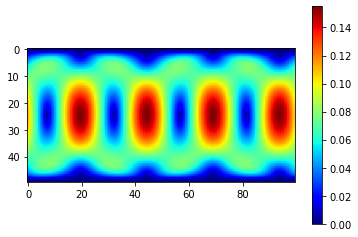

In [5]:
plt.imshow(np.sqrt(u**2+v**2),cmap='jet')
plt.colorbar()
plt.show()

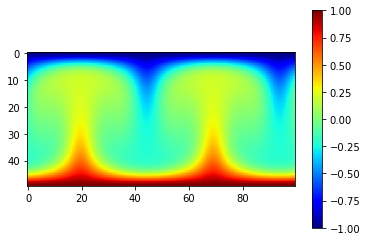

In [6]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

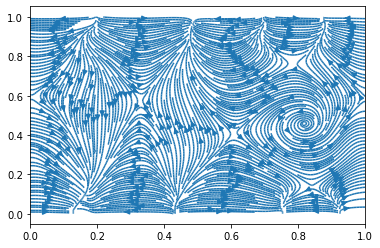

In [23]:
[X,Y]=np.meshgrid(x,y)
plt.streamplot(X,Y,u,v,density=4.0)
plt.show()

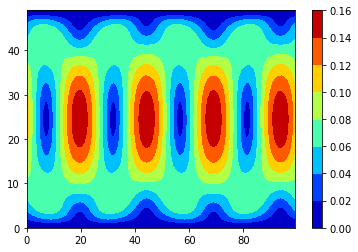

In [8]:
plt.contourf(np.sqrt(u**2+v**2),cmap='jet')
plt.colorbar()
plt.show()

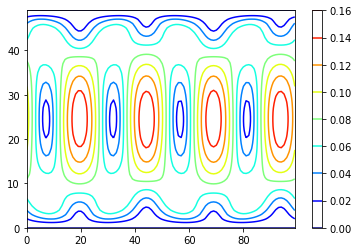

In [9]:
plt.contour(np.sqrt(u**2+v**2),cmap='jet')
plt.colorbar()
plt.show()

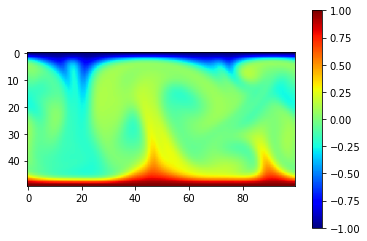

In [22]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

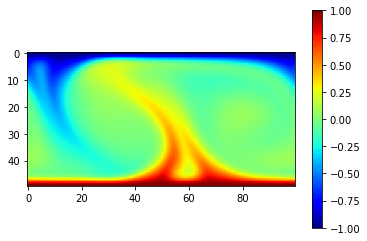

In [15]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

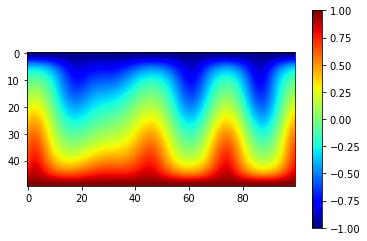

In [9]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

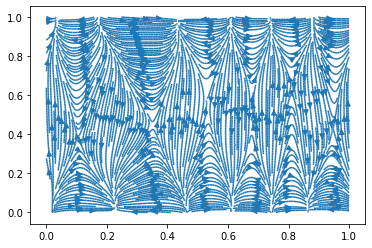

In [10]:
[X,Y]=np.meshgrid(x,y)
plt.streamplot(X,Y,u,v,density=4.0)
plt.show()

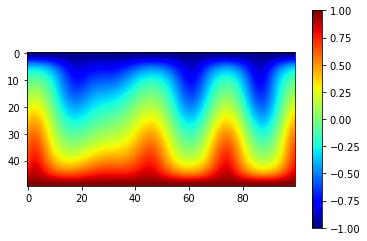

In [6]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

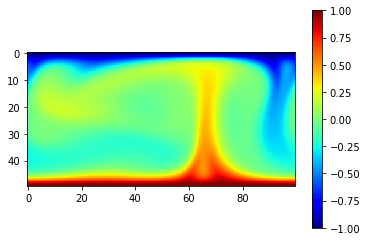

In [5]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

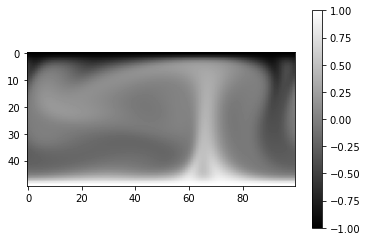

In [7]:
plt.imshow(T,cmap='gray')
plt.colorbar()
plt.show()

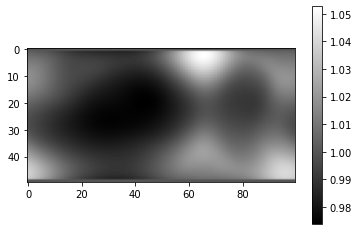

In [8]:
plt.imshow(rho,cmap='gray')
plt.colorbar()
plt.show()

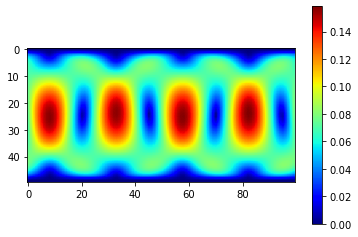

In [5]:
plt.imshow(np.sqrt(u**2+v**2),cmap='jet')
plt.colorbar()
plt.show()

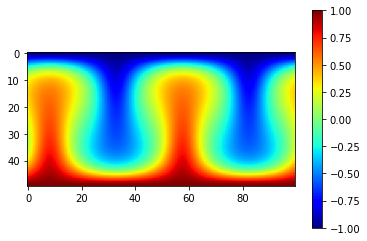

In [6]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

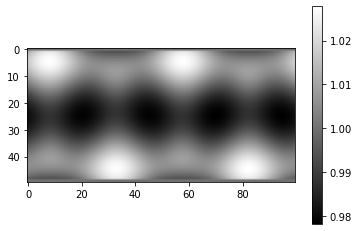

In [7]:
plt.imshow(rho,cmap='gray')
plt.colorbar()
plt.show()

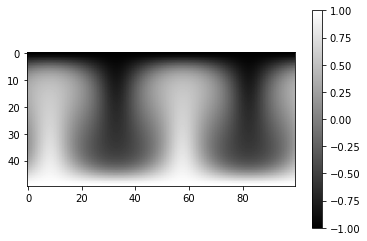

In [8]:
plt.imshow(T,cmap='gray')
plt.colorbar()
plt.show()

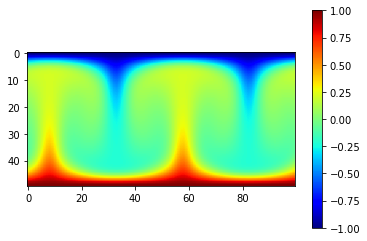

In [7]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

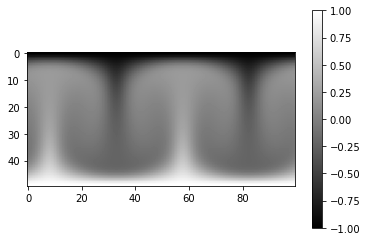

In [9]:
plt.imshow(T,cmap='gray')
plt.colorbar()
plt.show()

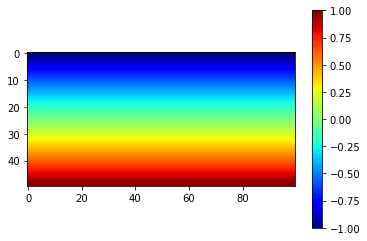

In [22]:
plt.imshow(T,cmap='jet')
plt.colorbar()
plt.show()

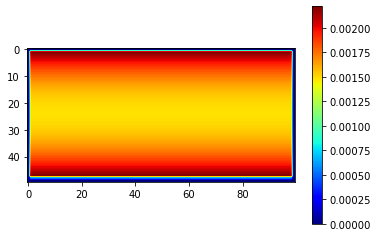

In [23]:
plt.imshow(S,cmap='jet')
plt.colorbar()
plt.show()
